<a href="https://colab.research.google.com/github/Chathura789/food_hygiene-data-pipeline/blob/main/Food_Ratings_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install urllib3
!pip install xmltodict

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import urllib3
import xmltodict
import openpyxl



In [ ]:
def foobar(request):
    file = urllib3.urlopen('https://ratings.food.gov.uk/OpenDataFiles/FHRS760en-GB.xml')
    data = file.read()
    file.close()

    data = xmltodict.parse(data)
    return {'xmldata': data}

In [ ]:
import requests
import json



url = "http://api.ratings.food.gov.uk/Establishments/basic/"



headers = {
    'x-api-version': '2',
    'Accept': 'application/json',
}



response = requests.get(url, headers=headers)



data = response.json()



# print the data
print(json.dumps(data, indent=2))



# save the data to a file
with open('hygiene_data.json', 'w') as f:
    json.dump(data, f)

{
  "establishments": [
    {
      "FHRSID": 1549111,
      "LocalAuthorityBusinessID": "201744",
      "BusinessName": "' THE ARGENTINIAN ''",
      "BusinessType": "Takeaway/sandwich shop",
      "RatingValue": "1",
      "RatingDate": "2022-11-07T00:00:00",
      "links": [
        {
          "rel": "self",
          "href": "http://api.ratings.food.gov.uk/establishments/1549111"
        }
      ]
    },
    {
      "FHRSID": 1466637,
      "LocalAuthorityBusinessID": "R115D335BH/2",
      "BusinessName": "!NOSH!",
      "BusinessType": "Takeaway/sandwich shop",
      "RatingValue": "Pass",
      "RatingDate": "2022-03-02T00:00:00",
      "links": [
        {
          "rel": "self",
          "href": "http://api.ratings.food.gov.uk/establishments/1466637"
        }
      ]
    },
    {
      "FHRSID": 1315638,
      "LocalAuthorityBusinessID": "219190",
      "BusinessName": "\"A Cheeky Slice\"",
      "BusinessType": "Retailers - other",
      "RatingValue": "5",
      "RatingDa

In [ ]:
import pandas as pd
import json



# Load data from file
with open('hygiene_data.json') as f:
    data = json.load(f)



# Convert to DataFrame
df = pd.json_normalize(data['establishments'])



# Show the DataFrame
df.head()

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,RatingValue,RatingDate,links
0,1549111,201744,' THE ARGENTINIAN '',Takeaway/sandwich shop,1,2022-11-07T00:00:00,"[{'rel': 'self', 'href': 'http://api.ratings.f..."
1,1466637,R115D335BH/2,!NOSH!,Takeaway/sandwich shop,Pass,2022-03-02T00:00:00,"[{'rel': 'self', 'href': 'http://api.ratings.f..."
2,1315638,219190,"""A Cheeky Slice""",Retailers - other,5,2022-11-24T00:00:00,"[{'rel': 'self', 'href': 'http://api.ratings.f..."
3,1455216,22/00006/COMM,"""All Things Nice""",Manufacturers/packers,Pass,2022-01-27T00:00:00,"[{'rel': 'self', 'href': 'http://api.ratings.f..."
4,134047,67154,"""Buttylicious""",Takeaway/sandwich shop,5,2019-02-12T00:00:00,"[{'rel': 'self', 'href': 'http://api.ratings.f..."


In [ ]:
# Write the DataFrame to an Excel
#file
df.to_excel('Aberdeen_data.xlsx', index=False)

In [ ]:
import requests
from lxml import etree
import pandas as pd



In [ ]:
import requests
from lxml import etree
import pandas as pd

# List of XML data URLs
urls = [
    'https://ratings.food.gov.uk/OpenDataFiles/FHRS760en-GB.xml',
    'https://ratings.food.gov.uk/OpenDataFiles/FHRS761en-GB.xml'
]

# Initialize an empty list to hold all data
all_data = []

# Iterate over each URL
for url in urls:
    # Get XML data
    response = requests.get(url)
    xml_data = response.content

    # Parse XML data
    tree = etree.fromstring(xml_data)

    # Convert XML to dataframe
    data = []
    for establishment in tree.findall('.//EstablishmentDetail'):
        row = {}
        for field in establishment:
            if field.text:
                row[field.tag] = field.text
            elif field.getchildren():  # Special handling for nested elements like Geocode
                for child in field:
                    row[child.tag] = child.text
        data.append(row)

    # Append the data from this URL to the master list
    all_data.extend(data)

# Create a dataframe from all_data
df = pd.DataFrame(all_data)

print(df)



       FHRSID LocalAuthorityBusinessID               BusinessName  \
0     1608170                EHDC15239  (CURATED) MOROCCAN MARKET   
1      982849                EHDC12463  1 & 30 DONALD DEWAR COURT   
2     1523164                EHDC15005     12 KEBAB & PIZZA HOUSE   
3     1418061                EHDC13206                        1DS   
4      593681                 EHDC9793                 210 BISTRO   
...       ...                      ...                        ...   
4586  1281698                    72118             Zees Peri Peri   
4587  1624276                    73678       Zingy Tingy Beetroot   
4588   800063                    18973                Zion Church   
4589   571343                    48006         Zoe's Tasty Treats   
4590  1628876                    73696                    Zoomies   

                             BusinessType BusinessTypeID  \
0                       Retailers - other           4613   
1     Hospitals/Childcare/Caring Premises          

In [ ]:
df.head()

,FHRSID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine2,AddressLine3,PostCode,RatingValue,RatingKey,...,LocalAuthorityCode,LocalAuthorityName,LocalAuthorityWebSite,LocalAuthorityEmailAddress,SchemeType,NewRatingPending,AddressLine4,Longitude,Latitude,AddressLine1
0,1608170,EHDC15239,(CURATED) MOROCCAN MARKET,Retailers - other,4613,George Street,Aberdeen,AB25 1HZ,Awaiting Inspection,fhis_awaiting_inspection_en-GB,...,760,Aberdeen City,http://www.aberdeencity.gov.uk,commercial@aberdeencity.gov.uk,FHIS,False,NaN,NaN,NaN,NaN
1,982849,EHDC12463,1 & 30 DONALD DEWAR COURT,Hospitals/Childcare/Caring Premises,5,1 & 30 Donald Dewar Court,Provost Fraser Drive,AB16 5JB,Pass,fhis_pass_en-GB,...,760,Aberdeen City,http://www.aberdeencity.gov.uk,commercial@aberdeencity.gov.uk,FHIS,False,Aberdeen,-2.16749501228333,57.1613082885742,NaN
2,1523164,EHDC15005,12 KEBAB & PIZZA HOUSE,Takeaway/sandwich shop,7844,12 Greenfern Place,Aberdeen,AB16 6JR,Awaiting Inspection,fhis_awaiting_inspection_en-GB,...,760,Aberdeen City,http://www.aberdeencity.gov.uk,commercial@aberdeencity.gov.uk,FHIS,False,NaN,-2.1619155,57.1552102,NaN
3,1418061,EHDC13206,1DS,Pub/bar/nightclub,7843,1 Diamond Street,Aberdeen,AB10 1QU,Awaiting Inspection,fhis_awaiting_inspection_en-GB,...,760,Aberdeen City,http://www.aberdeencity.gov.uk,commercial@aberdeencity.gov.uk,FHIS,False,NaN,-2.103685,57.145692,NaN
4,593681,EHDC9793,210 BISTRO,Restaurant/Cafe/Canteen,1,210 Market Street,Aberdeen,AB11 5PQ,Pass,fhis_pass_en-GB,...,760,Aberdeen City,http://www.aberdeencity.gov.uk,commercial@aberdeencity.gov.uk,FHIS,False,NaN,-2.092258,57.142278,NaN


In [ ]:
df.shape

(121, 10)

<Axes: >

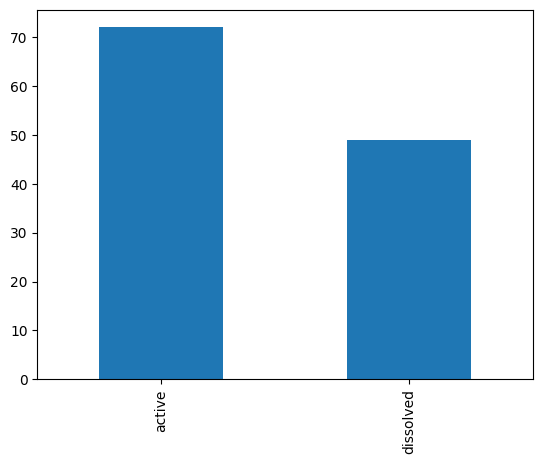

In [ ]:
# To do some exploratory vis, we can graph counts of categorical data
fig, ax = plt.subplots()
df['company_status'].value_counts().plot(kind='bar')

In [ ]:
# loc function is handy to quickly filter data! https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html
df.loc[df["company_status"] == "active"]

,company_name,company_number,company_status,company_type,kind,links,date_of_cessation,date_of_creation,registered_office_address,sic_codes
7,MEDIA SURGERY LTD,SC577173,active,ltd,search-results#company,{'company_profile': '/company/SC577173'},NaN,2017-09-25,"{'address_line_1': '214 Union Street', 'locali...","[62012, 63120, 74100]"
8,OBERON TRADING SYSTEMS LIMITED,SC683617,active,ltd,search-results#company,{'company_profile': '/company/SC683617'},NaN,2020-12-14,"{'address_line_1': '29 Ashley Park Drive', 'lo...",[62012]
9,STREAMBA LTD,SC389674,active,ltd,search-results#company,{'company_profile': '/company/SC389674'},NaN,2010-11-29,"{'address_line_1': '28 Albyn Place', 'locality...","[62012, 62020]"
10,INSISO LTD,SC391782,active,ltd,search-results#company,{'company_profile': '/company/SC391782'},NaN,2011-01-19,"{'address_line_1': '5 Carden Place', 'locality...",[62012]
11,IOI GROUP LTD,SC646113,active,ltd,search-results#company,{'company_profile': '/company/SC646113'},NaN,2019-11-04,"{'address_line_1': 'Johnstone House', 'address...","[20130, 20140, 20590, 62012]"
...,...,...,...,...,...,...,...,...,...,...
115,DDK POSITIONING LIMITED,SC551326,active,ltd,search-results#company,{'company_profile': '/company/SC551326'},NaN,2016-11-28,"{'address_line_1': 'Balmoral Business Park', '...","[26511, 61200, 61900, 62012]"
116,MEJJ CONSULTING LTD,SC610845,active,ltd,search-results#company,{'company_profile': '/company/SC610845'},NaN,2018-10-15,"{'address_line_1': '6 Boyd Orr Place', 'locali...","[62012, 82990]"
118,DATIA IT LTD,SC663081,active,ltd,search-results#company,{'company_profile': '/company/SC663081'},NaN,2020-06-04,"{'address_line_1': '8 Bishopston Gardens', 'ad...","[62011, 62012, 62020, 62090]"
119,DIGICREATIONS LIMITED,SC761619,active,ltd,search-results#company,{'company_profile': '/company/SC761619'},NaN,2023-03-09,{'address_line_1': '151 Charleston Road North'...,"[62012, 62020, 63110, 63120]"


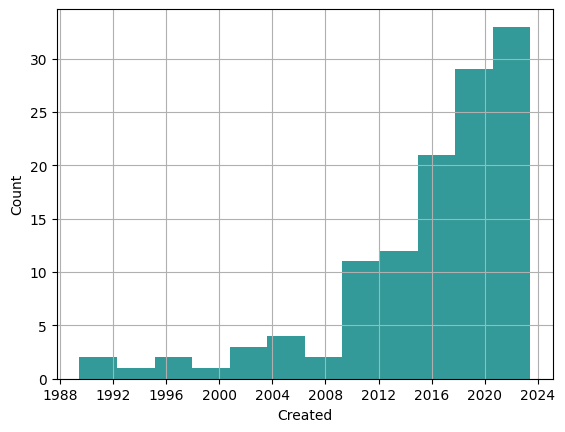

In [ ]:
# We can interrogate distribution of registrations by putting them into 'bins'
# Here I have selected 12 'bins', try adjusting and seeing what works

from datetime import datetime
df['creation_datetime'] = pd.to_datetime(df['date_of_creation'])

ax = df["creation_datetime"].hist(bins=12, color='teal', alpha=0.8)
ax.set(xlabel='Created', ylabel='Count')
plt.show()

In [ ]:
exploded_df = df.explode('sic_codes')
exploded_df.head()

,company_name,company_number,company_status,company_type,kind,links,date_of_cessation,date_of_creation,registered_office_address,sic_codes,creation_datetime
0,BSPOQ LIMITED,SC654410,dissolved,ltd,search-results#company,{'company_profile': '/company/SC654410'},2021-08-24,2020-02-13,"{'address_line_1': '11 Thistle Place', 'locali...",62012,2020-02-13
1,ICE IDENTIFICATION LIMITED,SC456271,dissolved,ltd,search-results#company,{'company_profile': '/company/SC456271'},2018-04-17,2013-08-07,{'address_line_1': 'Plenderleath Runcie Anders...,46510,2013-08-07
1,ICE IDENTIFICATION LIMITED,SC456271,dissolved,ltd,search-results#company,{'company_profile': '/company/SC456271'},2018-04-17,2013-08-07,{'address_line_1': 'Plenderleath Runcie Anders...,47410,2013-08-07
1,ICE IDENTIFICATION LIMITED,SC456271,dissolved,ltd,search-results#company,{'company_profile': '/company/SC456271'},2018-04-17,2013-08-07,{'address_line_1': 'Plenderleath Runcie Anders...,62012,2013-08-07
2,COKB LIMITED,SC455813,dissolved,ltd,search-results#company,{'company_profile': '/company/SC455813'},2016-03-15,2013-08-01,"{'address_line_1': '33 Holeburn Street', 'loca...",62012,2013-08-01


<Axes: >

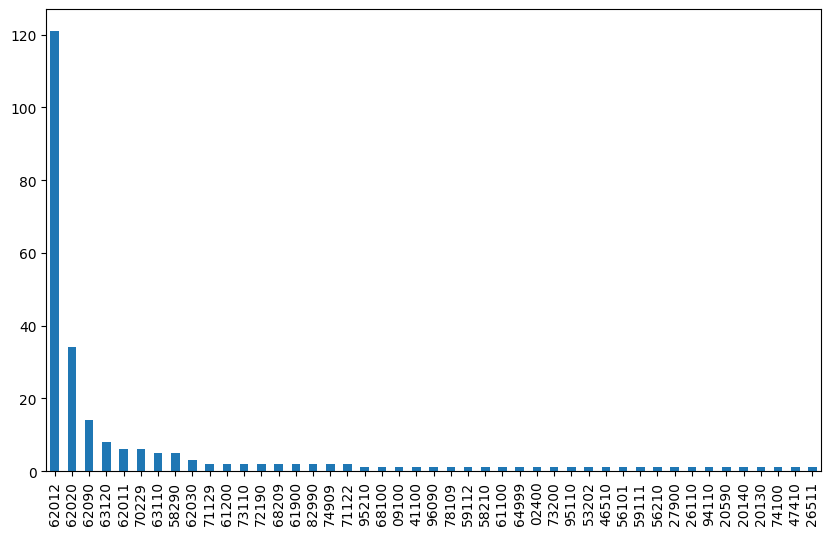

In [ ]:
# Counts of different sic_codes
%matplotlib inline
fig, ax = plt.subplots(figsize=(10, 6))
exploded_df['sic_codes'].value_counts().plot(kind='bar')

In [ ]:
# Challenge ideas
# - This is only a portion of the data available for Aberdeen. What needs to be done to get the whole picture?
# - Directorship data doesn't come in search results, how would you augment our data with details of co. directors?
# - What about other cities or industries how might they compare?
# - Anything else you found interesting!

In [ ]:
# - This is only a portion of the data available for Aberdeen. What needs to be done to get the whole picture?
#

In [ ]:
tables=pd.read_html("https://en.wikipedia.org/wiki/AB_postcode_area")

In [ ]:
Aberdeen = tables[1]

In [ ]:
Aberdeen.head()

,Postcode district,Post town,Coverage,Local authority area(s)
0,AB10,ABERDEEN,"Bridge of Dee, Mannofield, Ruthrieston",Aberdeen
1,AB11,ABERDEEN,"Ferryhill, Torry",Aberdeen
2,AB12,ABERDEEN,"Altens, Ardoe, Banchory Devenick, Blairs, Brid...","Aberdeen, Aberdeenshire"
3,AB13,MILLTIMBER,Milltimber,Aberdeen
4,AB14,PETERCULTER,"Peterculter, Upper Anguston",Aberdeen


In [ ]:
Aberdeen.columns

Index(['Postcode district', 'Post town', 'Coverage',
       'Local authority area(s)'],
      dtype='object')

In [ ]:
ABPostcode = Aberdeen['Postcode district'].tolist()

In [ ]:
ABPostcode

['AB10',
 'AB11',
 'AB12',
 'AB13',
 'AB14',
 'AB15',
 'AB16',
 'AB21',
 'AB22',
 'AB23',
 'AB24',
 'AB25',
 'AB30',
 'AB31',
 'AB32',
 'AB33',
 'AB34',
 'AB35',
 'AB36',
 'AB37',
 'AB38',
 'AB39',
 'AB41',
 'AB42',
 'AB43',
 'AB44',
 'AB45',
 'AB51',
 'AB52',
 'AB53',
 'AB54',
 'AB55',
 'AB56',
 'AB99']

In [ ]:
# Hey perkins check this i am getting an error anything you can help with

# Let's gather up some results
import time
postcodes = ["AB10", "AB11", "AB12", "AB13"]
results = []
request_url = "https://api.company-information.service.gov.uk/advanced-search/companies?size=5000&sic_codes=62012"

for postcode in ABPostcode:
    response = httpx.get(request_url+"&location="+postcode, auth=auth_tuple)
    result = json.loads(response.content)
    results = results + result.get('items', []) # concatenate result list
    time.sleep(10) # lets pause to allow server to breathe!

results

JSONDecodeError: ignored

# decline of certain industries 100 % bars over time